## LeNet-1992

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import datetime
from tensorflow.keras.preprocessing.image import img_to_array, load_img

mnist = tf.keras.datasets.mnist
(x_trains,y_trains),(x_tests,y_tests) = mnist.load_data()
x_trainsrsh,x_testsrsh = x_trains.reshape(-1,28,28,1) / 255.0,x_tests.reshape(-1,28,28,1) / 255.0
print(x_trains.shape,y_trains.shape,y_trains.dtype,y_trains[0:2])

def LeNet():
    model = tf.keras.Sequential([
                tf.keras.layers.Conv2D(filters=20,kernel_size=(5,5),
                    strides=(1,1),padding='valid',activation='relu',
                    kernel_initializer='uniform',input_shape=(28,28,1)),
                tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                tf.keras.layers.Conv2D(50,5,activation='relu'),
                tf.keras.layers.MaxPool2D(),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(100,activation='relu'),
                tf.keras.layers.Dense(10,activation='softmax')
                ])
    return model
model = LeNet()
model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

log_dir = os.path.join(os.getcwd(),'lenet','logs','fit', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x_trainsrsh,y_trains,epochs=4,validation_data=(x_testsrsh,y_tests),callbacks=[tensorboard_callback])
#model.evaluate(x_testsrsh,y_tests)
# def imgshow():
#     global x_trains,y_trains
    
#     plt.figure(figsize=(10,10))
    
#     for i,j in zip(np.random.randint(3,size=25),range(25)):
#         plt.subplot(5,5,j+1)
#         plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
#         plt.imshow(x_trains[i],cmap=plt.cm.binary)
#         plt.xlabel(y_trains[i])
#     plt.show()
# imgshow()




(60000, 28, 28) (60000,) uint8 [5 0]
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               80100     
_________________________________________________________________
dense_27 (Dense) 

In [44]:
model.save_weights('./checkpoint/my_model')

new_model = LeNet()
new_model.load_weights('./checkpoint/my_model')
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
loss,acc = new_model.evaluate(x_tests.reshape(-1,28,28,1),y_tests,verbose=2)
print('Restored Model loss:%,acc:%'(loss,acc))

10000/10000 - 3s - loss: 16.6650 - accuracy: 0.9741


TypeError: 'str' object is not callable

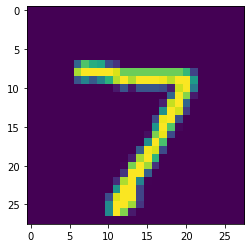

In [37]:
x_testsrsh= np.expand_dims(x_testsrsh[0],0)
predict = model.predict(x_testsrsh)
np.argmax(predict)

plt.imshow(x_tests[0])

In [13]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [15]:
%tensorboard --logdir lenet/logs/fit

Reusing TensorBoard on port 6006 (pid 15100), started 0:04:21 ago. (Use '!kill 15100' to kill it.)

#### 可视化特征图

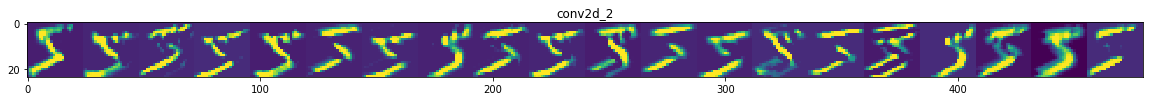

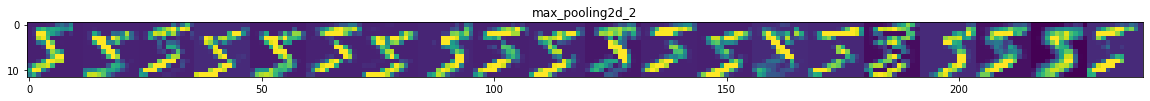

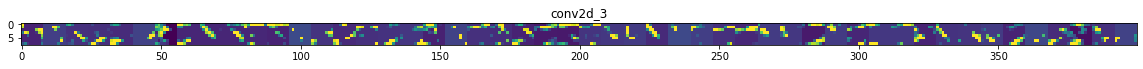

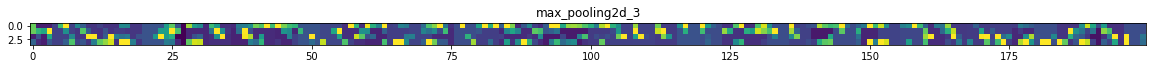

In [7]:
# print(x_trainsrsh[0].shape,x_trains[0].shape,x_trains[0].reshape(-1,28,28,1).shape,x_trains[0].reshape((1,)+x_trains[0].shape).shape,x_tests[0].shape)
x_predict = x_trains[0].reshape(-1,28,28,1)
successive_outputs = [layers.output for layers in model.layers[:]]
visualization_model = tf.keras.Model(inputs = model.input,outputs = successive_outputs)

successive_feature_maps = visualization_model.predict(x_predict)
layer_names = [layer.name for layer in model.layers[:]]

for layer_name,feature_map in zip(layer_names,successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size,size * n_features))
        for i in range(n_features):
            x = feature_map[0,:,:,i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0,255).astype('uint8')
            display_grid[:,i*size:(i+1)*size] = x
            
        scale = 20. / n_features
        plt.figure(figsize=(scale*n_features,scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid,aspect='auto',cmap='viridis')

#### Visualization Intermediate Representations可视化特征图——来自deeplearning.ai源码

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

### 通过继承类来构建模型

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *

mnist = tf.keras.datasets.mnist
(x_trains,y_trains),(x_tests,y_tests) = mnist.load_data()
images,labels = x_trains.reshape(-1,28,28,1) / 255.0,y_trains / 255.0

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)
model = MyModel()

with tf.GradientTape() as tape:
  logits = model(images)
  loss_value = loss(logits, labels)
grads = tape.gradient(loss_value, model.trainable_variables)
optimizer.apply_gradients(zip(grads, model.trainable_variables))

## AlexNet-2012

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trains,y_trains),(x_tests,y_tests) = fashion_mnist.load_data()
x_trains,x_tests = x_trains.reshape(-1,28,28,1) / 255.0,x_tests.reshape(-1,28,28,1) / 255.0

print(x_trains.shape)
# x_trains.dtype
def AlexNet():
    
    model= tf.keras.Sequential([
        Conv2D(filters=30,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(28,28,1)),
        MaxPool2D(pool_size=(3,3),strides=(2,2)),
        Conv2D(filters=60,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu'),
        MaxPool2D(pool_size=(3,3),strides=(2,2)),
#         Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
#         Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
#         Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
#         MaxPool2D(pool_size=(2,2),strides=(2,2)),
        Flatten(),
#         Dense(1000,activation='relu'),
#         Dropout(0.5),
        Dense(1000,activation='relu'),
        Dropout(0.5),
        Dense(10,activation='softmax')])
    return model

model = AlexNet()
model.summary()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.fit(x_trains,y_trains,batch_size=128,epochs=5)
model.evaluate(x_tests,y_tests)

## ZFNet-2013

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trains,y_trains),(x_tests,y_tests) = fashion_mnist.load_data()
x_trains,x_tests = x_trains.reshape(-1,28,28,1) / 255.0,x_tests.reshape(-1,28,28,1) / 255.0

print(x_trains.shape)
# x_trains.dtype
def ZFNet():
    
    model= tf.keras.Sequential([
        Conv2D(filters=96,kernel_size=(7,7),strides=(2,2),padding='same',activation='relu',input_shape=(28,28,1)),
        MaxPool2D(pool_size=(3,3),strides=(2,2)),
        Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu'),
        MaxPool2D(pool_size=(3,3),strides=(2,2)),
        Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
        Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
        Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
        MaxPool2D(pool_size=(3,3),strides=(2,2)),
        Flatten(),
        Dense(4096,activation='relu'),
        Dropout(0.5),
        Dense(4096,activation='relu'),
        Dropout(0.5),
        Dense(1000,activation='softmax')])
    return model

model = ZFNet()
model.summary()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.fit(x_trains,y_trains,batch_size=128,epochs=5)
model.evaluate(x_tests,y_tests)

model.predict(x_trains[1]
              
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()[[[1,2],[4,5],[7,8]],[[10,11],[13,14],[16,17]],[[19,20],[22,23],[25,26]]],shape=(3,3,2)

## VGG-Net-2014

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist
(x_trains,y_trains),(x_tests,y_tests) = mnist.load_data()
x_trains,x_tests = x_trains.reshape(-1,28,28,1) / 255.0,x_tests.reshape(-1,28,28,1) / 255.0
# print(x_trains[0],x_trains.dtype,y_trains[0],y_trains.dtype)
# plt.imshow(x_trains[1]/225.0)
# plt.show

def VGGNet16():
    model = tf.keras.Sequential()
    '''
    Conv2D(filters,kernel_size,strides,padding,activation,
    kernel_initializer,input_shape)
    MaxPool2D(pool_size,strides,padding)
    '''
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',
                     activation='relu',input_shape=(224,224,3)))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',
                     activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',
                     activation='relu'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',
                     activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',
                     activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',
                     activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',
                     activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',
                     activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',
                     activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',
                     activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',
                     activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',
                     activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',
                     activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000,activation='softmax'))
    
    return model

model = VGGNet16()
model.summary()
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit(x_trains,y_trains,batch_size=64,epochs=1)
# model.evaluate(x_tests,y_tests)

### VGG易修改版

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model,Sequential,Input
from tensorflow.keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,Flatten,Dense
from tensorflow.keras.layers import Activation,BatchNormalization,Dropout,Softmax,Layer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

vgg_cfg = {
    '11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    '13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    '16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    '19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],}
fc_cfg = [4096,'D',4096,'D']

#以下各个模块的定义函数返回的都是层列表list,因为Sequential([])

#定义conv_bn_act模块，可易于调整是否使用bn层和更改激活函数
def block_conv_bn_act(out_channels,strides=1,activation='relu',kernel_regularizer=None,bn=False):
  
  if bn:
    block = [Conv2D(out_channels,(3,3),strides=strides,padding='same',kernel_regularizer=kernel_regularizer,use_bias=False),
          BatchNormalization(),
          Activation(activation=activation)]
  else:
    block = [Conv2D(out_channels,(3,3),strides=strides,padding='same',activation=activation,kernel_regularizer=kernel_regularizer)]
  return block

#定义网络主体，通过对cfg进行循环，可便携修改层数和是否添加pooling层
def state_layer(cfg,activation='relu',regularizer=None,batch_norm=False):
  state_layer_list = []
  for n in cfg:
    if n == 'M':
      state_layer_list += [MaxPool2D(pool_size=2,strides=2)]
    else:
      state_layer_list += block_conv_bn_act(n,activation=activation,kernel_regularizer=regularizer,bn=batch_norm)
  return state_layer_list

#定义网络的输出头，通过cfg可以决定全连接层是否使用Dropout
def header_layer(cfg,avgpool=False,activation='relu',num_classes=1000,lr=0.5):

  header_layer_list = []
  if avgpool:
    fc_before_layer = [GlobalAveragePooling2D()]
  else:
    fc_before_layer = [Flatten()]
  for n in cfg:
    if n == 'D':
      header_layer_list += [Dropout(lr)]
    else:
      header_layer_list += [Dense(n,activation=activation)]

  classifier = fc_before_layer + header_layer_list + [Dense(num_classes,activation='softmax')]

  return classifier

#输入层的定义
def input_layer(input_shape=(224,224,3)):
  return [Input(shape=input_shape)]

#实例化，注意这些函数的返回都是列表[]
vgg_input = input_layer()
vgg_body = state_layer(vgg_cfg['19'])
vgg_output = header_layer(fc_cfg)

#因为vgg_input,vgg_body,vgg_output的值都是列表[]类型
#传入到Seqeuential()，是vgg_input+vgg_body+vgg_output形式
model = Sequential(vgg_input+vgg_body+vgg_output)
model.summary()

## GoogLeNet Inception v1-2014

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *

#加载cifar10数据集
cifar10 = tf.keras.datasets.cifar10
(x_trains,y_trains),(x_tests,y_tests) = cifar10.load_data()

#重设维度使其符合tensorflow的输入维度为4-D要求，并对图像除以进行归一化
x_trains,x_tests = x_trains[:1000].reshape(-1,224,224,3) / 255.0,x_tests[:100].reshape(-1,224,224,3) / 255.0

print(x_trains.shape,x_tests.shape)


def Inception_v1(x,filters):
    
    #Conv2D(filters,kernel_size,strides,padding,activation)
    #MaxPool2D(pool_size,strides)
    #1x1
    branch_1x1 = Conv2D(filters[0],(1,1),strides=(1,1),padding='same',activation='relu')(x)
    
    #1x1+3x3
    branch_1x1_3x3 = Conv2D(filters[1][0],(1,1),strides=(1,1),padding='same',activation='relu')(x)
    branch_1x1_3x3 = Conv2D(filters[1][1],(3,3),strides=(1,1),padding='same',activation='relu')(branch_1x1_3x3)
    
    #1x1+5x5
    branch_1x1_5x5 = Conv2D(filters[2][0],(1,1),strides=(1,1),padding='same',activation='relu')(x)
    branch_1x1_5x5 = Conv2D(filters[2][1],(1,1),strides=(1,1),padding='same',activation='relu')(branch_1x1_5x5)
    
    #MaxPool+1x1
    branch_maxpool_1x1 = MaxPool2D(pool_size=(3,3),strides=(1,1),padding='same')(x)
    branch_maxpool_1x1 = Conv2D(filters[3],(1,1),strides=(1,1),padding='same',activation='relu')(branch_maxpool_1x1)
    
    concat = concatenate([branch_1x1,branch_1x1_3x3,branch_1x1_5x5,branch_maxpool_1x1])
    return concat

def auxilitysoftmax(x):
    
    #softmax辅助分类器
    layer = AveragePooling2D(pool_size=(5,5),strides=(3,3),padding='valid')(x)
    layer = Conv2D(128,(1,1),1,padding='same',activation='relu')(layer)
    layer = Flatten()(layer)
    layer = Dense(1024,activation='relu')(layer)
    layer = Dropout(0.3)(layer)
    auxioutput = Dense(1000,activation='softmax')(layer)
    return auxioutput
    
def GoogLeNet():
    
    model_input = Input(shape=(224,224,3))
    dataflow = Conv2D(64,(7,7),2,padding='same',activation='relu')(model_input)
    dataflow = MaxPool2D((3,3),2,padding='same')(dataflow)
    dataflow = tf.nn.lrn(dataflow)
    dataflow = Conv2D(64,(1,1),1,padding='valid',activation='relu')(dataflow)
    dataflow = Conv2D(192,(3,3),1,padding='same',activation='relu')(dataflow)
    dataflow = tf.nn.lrn(dataflow)
    dataflow = MaxPool2D((3,3),2,padding='same')(dataflow)
    dataflow = Inception_v1(dataflow,[64,[96,128],[16,32],32])    #Inception3a
    dataflow = Inception_v1(dataflow,[128,[128,192],[32,96],64])  #Inception3b
    dataflow = MaxPool2D((3,3),2,padding='same')(dataflow)
    dataflow_1 = Inception_v1(dataflow,[192,[96,208],[16,48],64]) #Inception4a
    softmax_0 = auxilitysoftmax(dataflow_1)
    dataflow = Inception_v1(dataflow_1,[160,[112,224],[24,64],64]) #Inception4b
    dataflow = Inception_v1(dataflow,[128,[128,256],[24,64],64])   #Inception4c
    dataflow_2 = Inception_v1(dataflow,[112,[144,288],[32,64],64])   #Inception4d
    auxioutput_1 = auxilitysoftmax(dataflow_2)
    dataflow = Inception_v1(dataflow_2,[256,[160,320],[32,128],128]) #Inception4e
    dataflow = MaxPool2D((3,3),2,padding='same')(dataflow)
    dataflow = Inception_v1(dataflow,[256,[160,320],[32,128],128])
    dataflow = Inception_v1(dataflow,[384,[192,384],[48,128],128])
    dataflow = AveragePooling2D((7,7),1,padding='valid')(dataflow)  
    dataflow = Dropout(0.4)(dataflow)
    dataflow = Dense(1000,activation='linear')(dataflow)
    model_output = Dense(1000,activation='softmax')(dataflow)
    model = Model(inputs=model_input,outputs=model_output)
    return model

model = GoogLeNet()

model.summary

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit()

(50000, 32, 32, 3) (10000, 32, 32, 3)


### MobileNet易修改版

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model,Sequential,Input
from tensorflow.keras.layers import Conv2D,DepthwiseConv2D,MaxPool2D,GlobalAveragePooling2D,Flatten,Dense,ZeroPadding2D
from tensorflow.keras.layers import Activation,BatchNormalization,Dropout,Softmax,Layer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds


mobilenet_cfg = [['s1',64],['s2',128],['s1',128],['s2',256],['s1',256],['s2',512],['s1',512],['s1',512],['s1',512],['s1',512],['s1',512],['s2',1024],['s2',1024]]

def depthwise_pointwise_block(out_channels,strides=1,activation='relu',padding='same',kernel_regularizer=None,bn=True,layer_num=None):  
  
  if bn:
    block = [DepthwiseConv2D(kernel_size=(3,3),strides=strides,padding=padding,kernel_regularizer=kernel_regularizer,use_bias=False,name='depthwise_'+str(layer_num)),
          BatchNormalization(name='depthwise_'+str(layer_num)+'_bn'),
          Activation(activation=activation,name='depthwise_'+str(layer_num)+'_activation'),
          Conv2D(out_channels,(1,1),strides=1,padding='same',activation=activation,kernel_regularizer=kernel_regularizer,name='pointwise_'+str(layer_num)),
          BatchNormalization(name='pointwise_'+str(layer_num)+'_bn'),
          Activation(activation=activation,name='pointwise_'+str(layer_num)+'_activation')]
  else:
    block = [DepthwiseConv2D(kernel_size=(3,3),strides=strides,padding=padding,kernel_regularizer=kernel_regularizer,acitvation=acitvation,name='depthwise_'+str(layer_num)),
          Conv2D(out_channels,(1,1),strides=1,padding='same',kernel_regularizer=kernel_regularizer,activation=activation,name='pointwise_'+str(layer_num))]
  return block

def mobilenet_state_layer(cfg,activation='relu',regularizer=None,batch_norm=True):

  state_layer_list = []
  layer_num = 0
  for n in cfg:
    layer_num += 1
    if n[0] == 's2':
      
      #由于mobilenet最后一层dw/s2的输出大小不变，即padding='same',而不是'valid'
      if layer_num == len(cfg):
        state_layer_list += [ZeroPadding2D(padding=(3))] + depthwise_pointwise_block(n[1],strides=2,activation=activation,padding='same',kernel_regularizer=regularizer,bn=batch_norm,layer_num=layer_num)
      else:
        state_layer_list += [ZeroPadding2D(padding=((0,1),(0,1)))] + depthwise_pointwise_block(n[1],strides=2,activation=activation,padding='valid',kernel_regularizer=regularizer,bn=batch_norm,layer_num=layer_num)
    else:
      state_layer_list += depthwise_pointwise_block(n[1],strides=1,activation=activation,kernel_regularizer=regularizer,bn=batch_norm,layer_num=layer_num)
  
  return state_layer_list

def mobilenet_header_layer(num_classes=1000):
  header_layer_list = [GlobalAveragePooling2D(),Dense(num_classes,activation='softmax')]
  return header_layer_list

def mobilenet_input_layer(input_shape=(224,224,3),activation='relu'):
  return [Input(shape=input_shape),ZeroPadding2D(padding=((0,1),(0,1))),Conv2D(32,3,strides=2,activation=activation,name='conv2d_1')]

mobilenet_input = mobilenet_input_layer()
mobilenet_body = mobilenet_state_layer(mobilenet_cfg)
mobilenet_output = mobilenet_header_layer()

mobilenet_model = Sequential(mobilenet_input+mobilenet_body+mobilenet_output)
mobilenet_model.summary()

### ResNet

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model,Sequential,Input
from tensorflow.keras.layers import Conv2D,DepthwiseConv2D,MaxPool2D,GlobalAveragePooling2D,Flatten,Dense,ZeroPadding2D
from tensorflow.keras.layers import Activation,BatchNormalization,Dropout,Softmax,Layer,add
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import datetime,os
import h5py

cifar10 = tf.keras.datasets.cifar10
(x_trains,y_trains),(x_tests,y_tests) = cifar10.load_data()

#(50000,32,32,3),(50000,1),(10000,32,32,3),(10000,1)
#压缩y的形状(50000,) (10000,)
y_trains = tf.squeeze(y_trains,axis=1)
y_tests = tf.squeeze(y_tests,axis=1)

print(x_trains.shape,y_trains.shape,x_tests.shape,y_tests.shape)

resnet_cfg = {
    'resnet18':{'block_num':[2,2,2,2],'block_channels':[[64,64],[128,128],[256,256],[512,512]]},
    'resnet34':{'block_num':[3,4,6,3],'block_channels':[[64,64],[128,128],[256,256],[512,512]]},
    'resnet50':{'block_num':[3,4,6,3],'block_channels':[[64,64,256],[128,128,512],[256,256,1024],[512,512,2048]]},
    'resnet101':{'block_num':[3,4,23,3],'block_channels':[[64,64,256],[128,128,512],[256,256,1024],[512,512,2048]]},
    'resnet152':{'block_num':[3,8,36,3],'block_channels':[[64,64,256],[128,128,512],[256,256,1024],[512,512,2048]]}
    }

resnet_cfg_select = 'resnet18'


#类别数
num_classes = 10

##***实验对比条件***##
#是否使用预训练模型
pretrained = False
#是否使用数据增强
data_augmentation = True
#权重参数初始化
#kernel_init = 
#权重正则化
kernel_regularizer = None
#是否通过fc_cfg的'D'，来表示使用dropout ,如[256,'D',128,'D']
fc_cfg = [256,128]
#batch_size
batch_size = 128
#输入大小
input_shape_select = (32,32,3)
#激活函数
activation = 'relu'
#BN层使用
batch_normalization = True
#优化算法
optimizer = 'adam'
#损失函数
loss_function = 'sparse_categorical_crossentropy'
#评估指标
metrics = 'accuracy'


# weight_decay = 5e-4
# learning_rate = 1e-2
# dropout_rate = 0.5
# epoch_num = 200    

if data_augmentation:
    #train_data_batch = tf.data.Dataset.from_tensor_slice((x_trains,y_trains)).shuffle(1000).map(preprocess).batch(128)
    image_gen_train = ImageDataGenerator(rescale=1./255,rotation_range=45,width_shift_range=.15,height_shift_range=.15,horizontal_flip=True,zoom_range=0.5,validation_split=0.1)
    train_data = image_gen_train.flow(x_trains,y_trains,batch_size=batch_size,shuffle=True)
    test_data = ImageDataGenerator(rescale=1./255).flow(x_tests,y_tests)
else:
    train_data = ImageDataGenerator(rescale=1./255).flow(x_trains,y_trains,batch_size=batch_size,shuffle=True)
    test_data = ImageDataGenerator(rescale=1./255).flow(x_tests,y_tests)


def BasicBlock(out_channels,layer_num,strides=1,activation='relu',padding='same',kernel_regularizer=None,bn=True):

    #out_channel [64,64],[128,128]
    block_list = []
    n = 0
    for k_size in [3,3]:

        #n是block里的第几层conv
        n += 1

        #使用bn就无需use_bias
        if bn:
            use_bias=False
        else:
            use_bias=True
        
        #block的第一层
        if n==1:
            strides=strides
        else:
            strides=1

        block_list += [Conv2D(out_channels[n-1],kernel_size=k_size,strides=strides,padding=padding,kernel_regularizer=kernel_regularizer,use_bias=use_bias,name='basicblock_'+str(layer_num)+'_conv1')]

        #定义是否添加bn层
        if bn:
            block_list += [BatchNormalization(name='basicblock_'+str(layer_num)+'_bn'+str(n))]
        #basicblock的第2层是在shortcut之后才添加激活函数
        if n != 2:
            block_list += [Activation(activation=activation,name='basicblock_'+str(layer_num)+'_activation'+str(n))]

    return block_list

def BottleBlock(out_channels,layer_num,strides=1,activation='relu',padding='same',kernel_regularizer=None,bn=True):

  #out_channel [64,64,128]
  block_list = []
  n = 0

  for k_size in [1,3,1]:

    #n是单个block里的第几层conv
    n += 1

    #使用bn就无需use_bias
    if bn:
        use_bias=False
    else:
        use_bias=True
    
    #block的第一层
    if n==1:
        strides=strides
    else:
        strides=1
    block_list += [Conv2D(out_channels[n-1],kernel_size=k_size,strides=strides,padding=padding,kernel_regularizer=kernel_regularizer,use_bias=use_bias,name='bottleblock_'+str(layer_num)+'_conv1')]
    
    if bn:
        block_list += [BatchNormalization(name='bottleblock_'+str(layer_num)+'_bn'+str(n))]
    #bottleblock的第3层是在shortcut之后才添加激活函数
    if n != 3:
        block_list += [Activation(activation=activation,name='bottleblock_'+str(layer_num)+'_activation'+str(n))]
  
  return block_list

#加上跳跃连接
def skip_connect(x,block,cfg,layer_num,strides=1,activation='relu',padding='same',kernel_regularizer=None,bn=True):
  
    #skip connect H(x)=F(x)+x
    skip = block(cfg,layer_num=layer_num,strides=strides,activation=activation,padding=padding,kernel_regularizer=kernel_regularizer,bn=bn)
    input_data = x
    print('skip_input',x.shape)
    x = Sequential(skip,name='identify_block_'+str(layer_num))(input_data)
    print('skip_sequential',x.shape)
    if x.shape[-1] != input_data.shape[-1]:
      input_data = MaxPool2D(pool_size=(2,2),strides=2,padding='valid')(input_data)
      zero_pad = tf.zeros_like(input_data)
      input_data = tf.concat([input_data,zero_pad],axis=-1)

    x = add([x,input_data])
    x = Activation(activation=activation,name='add_after_activation_'+str(layer_num))(x)
    print('skip_activation',x.shape)

    return x

def resnet_state_layer(x,block_num,block_channels,activation='relu',kernel_regularizer=None,bn=True):
    
    
    if resnet_cfg_select in ['resnet50','resnet101','resnet152']:
        block_type_select = BottleBlock
    else:
        block_type_select = BasicBlock
        
    state_layer_input = x        
    block_channels_idx = -1
    layer_num = 0

    for n in block_num:
        #resnet_cfg字典中'block_channels'列表索引    
        block_channels_idx += 1
        
        for m in range(n):
            #layer_num表示整个网络的第几层，除了第1个block,其他block的第1层strides=2
            layer_num += 1
            if layer_num != 1 and m == 0:
                strides=2

            else:
                strides=1                
            #we      
            #print(str(n)+'_'+str(m),state_layer_input.shape)
            state_layer_output = skip_connect(state_layer_input,block_type_select,block_channels[block_channels_idx],layer_num,strides=strides,activation=activation,kernel_regularizer=kernel_regularizer,bn=bn)
            print('state_'+str(n)+'_'+str(m),state_layer_output.shape)
            state_layer_input = state_layer_output
            print('state_'+str(n)+'_'+str(m),state_layer_input.shape)

    return state_layer_output


def resnet_input_layer(x,kernel_size=(7,7),activation='relu',padding='valid',kernel_regularizer=None,bn=True):
  
    x = ZeroPadding2D(padding=3,name='zeropadding_1')(x)
    x = Conv2D(filters=64,kernel_size=kernel_size,strides=2,padding=padding,kernel_regularizer=kernel_regularizer,name='conv2d_1')(x)
    if bn:
        x = BatchNormalization(name='bn_1')(x)
    x = Activation(activation=activation,name='activation_1')(x)
    x = MaxPool2D(pool_size=(3,3),strides=2,padding='same',name='maxpool_1')(x)

    return x

def resnet_header_layer(x,num_classes=1000):
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes,activation='softmax')(x)

    return x

x = Input(shape=(224,224,3),name='input')
model_input = resnet_input_layer(x)
model_body = resnet_state_layer(model_input,resnet_cfg[resnet_cfg_select]['block_num'],resnet_cfg[resnet_cfg_select]['block_channels'])
model_output = resnet_header_layer(model_body)

model_2 = Model(x,model_output)
model_2.summary()